In [1]:
import numpy as np
from numpy import exp,log
from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5

In [2]:
def vasicek_yield(beta, mu, sigma, r, time_units):
    y = np.zeros(time_units+1)
    y[0] = r
    a, b = beta, beta*mu
    for T in range(1,time_units+1):
        B = (1-exp(-a*T))/a
        A = (B-T)*(a*b-0.5*sigma**2)/(a**2)-((a*B)**2)/(4*a) 
        p = exp(A-B*r) 
        y[T] = -1*log(p)/T
    return y

def cir_yield(beta, mu, sigma, r, time_units):
    y = np.zeros(time_units+1) 
    y[0] = r
    a, b = beta, beta*mu
    gamma = ((a)**2+2*(sigma**2))**0.5
    for T in range(1,time_units+1):
        D = ((gamma+a)*(exp(gamma*T)-1)+2*gamma)
        B = 2*(exp(gamma*T)-1)/D
        A = (2*gamma*exp((a+gamma)*(T/2))/D)**(2*a*b/(sigma**2))
        
        p = A*exp(-B*r)
        y[T] = -1*log(p)/T
    return y

In [3]:
def yield_vs_time_plot(model, parameters, time_units):
    plt.figure()
    for p in parameters:
        beta, mu, sigma, r = p
        if model == 'Vasicek':
            y = vasicek_yield(beta, mu, sigma, r, time_units)
        elif model == 'CIR':
            y = cir_yield(beta, mu, sigma, r, time_units)
        plt.plot(y, label=str(p))
    plt.title(model+' Model with given parameter sets')
    plt.xlabel('Time')
    plt.ylabel('Yield')
    plt.legend()
    plt.show()

def yield_vs_maturity_plot(model, parameters, time_units):
    for p in parameters:
        plt.figure()
        for r in np.arange(0.1,1.1,0.1):
            r = np.round_(r, 1)
            beta, mu, sigma, _ = p
            if model == 'Vasicek':
                y = vasicek_yield(beta, mu, sigma, r, time_units)
            elif model == 'CIR':
                y = cir_yield(beta, mu, sigma, r, time_units)
            plt.plot(y, label='r = '+str(r))
        if model == 'Vasicek':
            plt.title(model + " Model with beta, mu, sigma = "+str(p[:-1])+" using 10 different values of r")
        else:
            plt.title(model + " Model with beta, mu, sigma = "+str(p[:-1])+" r = 0.1 to 1")
        plt.xlabel('Time')
        plt.ylabel('Yield')
        plt.legend()
        plt.show()
    

In [4]:
def partA():
    p1 = [5.9, 0.2, 0.3, 0.1]
    p2 = [3.9, 0.1, 0.3, 0.2]
    p3 = [0.1, 0.4, 0.11, 0.1]
    yield_vs_time_plot('Vasicek', [p1, p2, p3], 10)
    yield_vs_maturity_plot('Vasicek', [p1, p2, p3], 500)
    
def partB():
    p1 = [0.02, 0.7, 0.02, 0.1]
    p2 = [0.7, 0.1, 0.3, 0.2]
    p3 = [0.06, 0.09, 0.5, 0.02]
    yield_vs_time_plot('CIR', [p1, p2, p3], 10)
    yield_vs_maturity_plot('CIR', [p1], 600)
    

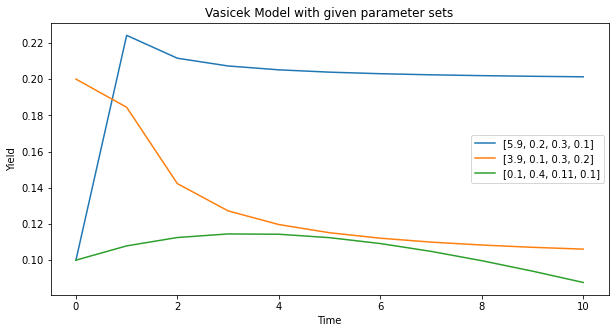

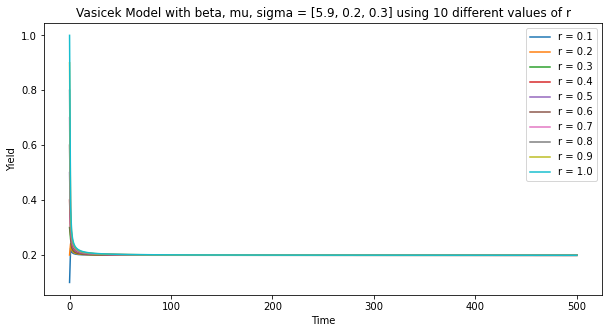

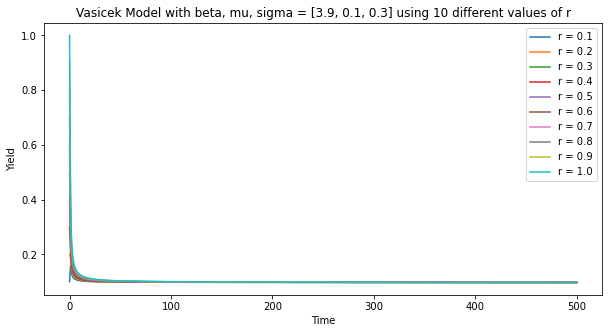

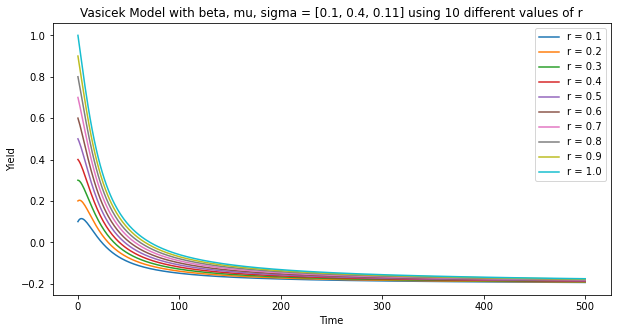

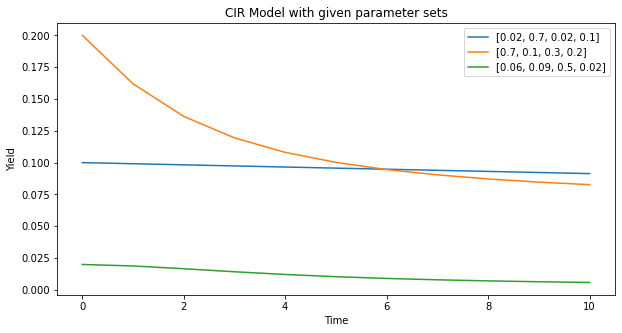

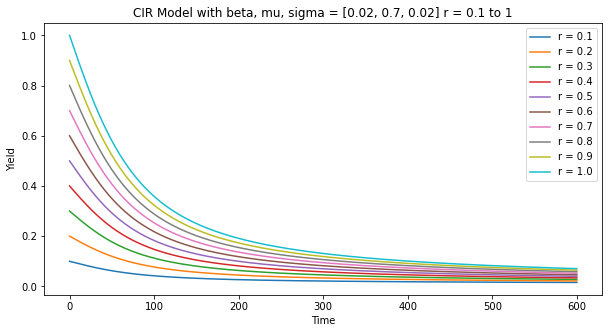

In [5]:
partA()
partB()